A bifurcation occurs when a small smooth change made to the parameter values (the bifurcation parameters) of a system causes a sudden 'qualitative' or topological change in its behavior. A Hopf bifurcation is a critical point where a system's stability switches and a periodic solution arises. The normal form of a Hopf bifurcation is

$$\begin{split} \dot{x} & = \mu x + \omega y - x(x^2 + y^2) \\
\dot{y} & = - \omega x + \mu y - y(x^2 + y^2)
\end{split}$$

Other than the glycolysis model, the [Hodgkin-Huxley model](https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model) also undergoes Hopf bifurcation if the injected current $I$ is used as the bifurcation parameter $\mu$. In the case of the normal form, we can rewrite it as

$$\begin{split} \dot{\mu} & = 0 \\
\dot{x} & = \mu x + \omega y - x(x^2 + y^2) \\
\dot{y} & = - \omega x + \mu y - y(x^2 + y^2)
\end{split}$$

Our goal is to collect data from different initial conditions to study the behaviour of the system.

Reference: https://en.wikipedia.org/wiki/Bifurcation_theory

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pickle

In [9]:
with open('3-d_bifurcation.pkl', 'rb') as file:
    hopf = pickle.load(file)
    
hopf_data = hopf['data']
hopf_pred = hopf['pred']

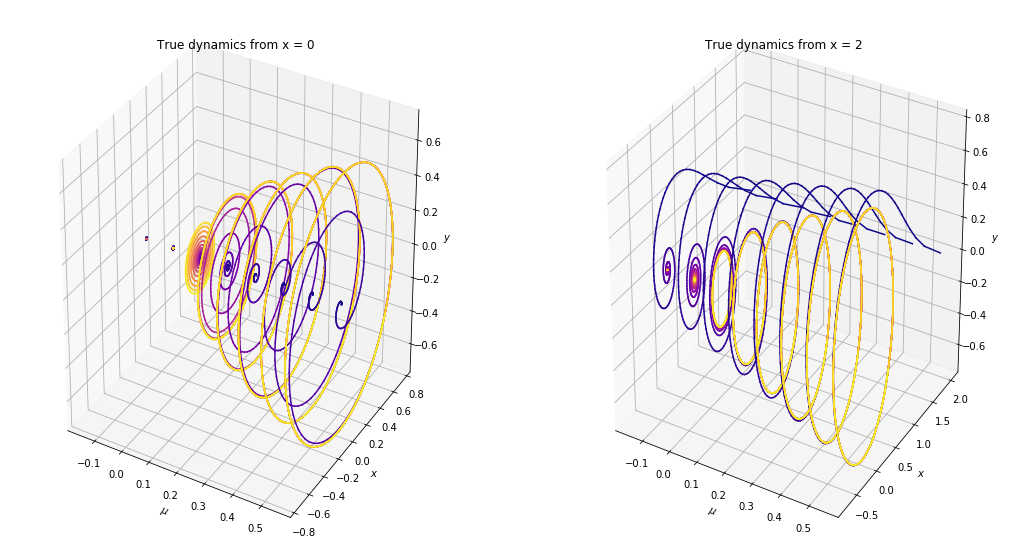

In [7]:
# two control points
checkpt = 8

fig = plt.figure(figsize=(18,10)) # twice as wide as it is tall
ax = fig.add_subplot(1, 2, 1, projection='3d')

for j in range(0, checkpt):
    mu = hopf_data[j, :, 0]
    x = hopf_data[j, :, 1]
    y = hopf_data[j, :, 2]
    
    for i in range(0, len(x)):
        ax.plot(mu[i:i+2], x[i:i+2], y[i:i+2], color=plt.cm.plasma(int(255*i/len(x))))

ax.set_xlabel('$\mu$')
ax.set_ylabel('$x$')
ax.set_zlabel('$y$')
ax.set_title('True dynamics starting from x = 0', fontsize = 12, loc='center', pad=2.0)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for j in range(checkpt, hopf_data.shape[0]):
    mu = hopf_data[j, :, 0]
    x = hopf_data[j, :, 1]
    y = hopf_data[j, :, 2]
    
    for i in range(0, len(x)):
        ax.plot(mu[i:i+2], x[i:i+2], y[i:i+2], color=plt.cm.plasma(int(255*i/len(x))))

ax.set_xlabel('$\mu$')
ax.set_ylabel('$x$')
ax.set_zlabel('$y$')
ax.set_title('True dynamics starting from x = 2', fontsize = 12, loc='center', pad=2.0)

plt.show()

The system is bistable: note the transition from a stable fixed point to **unstable fixed point with stable limit cycle** at $\mu = 0$.

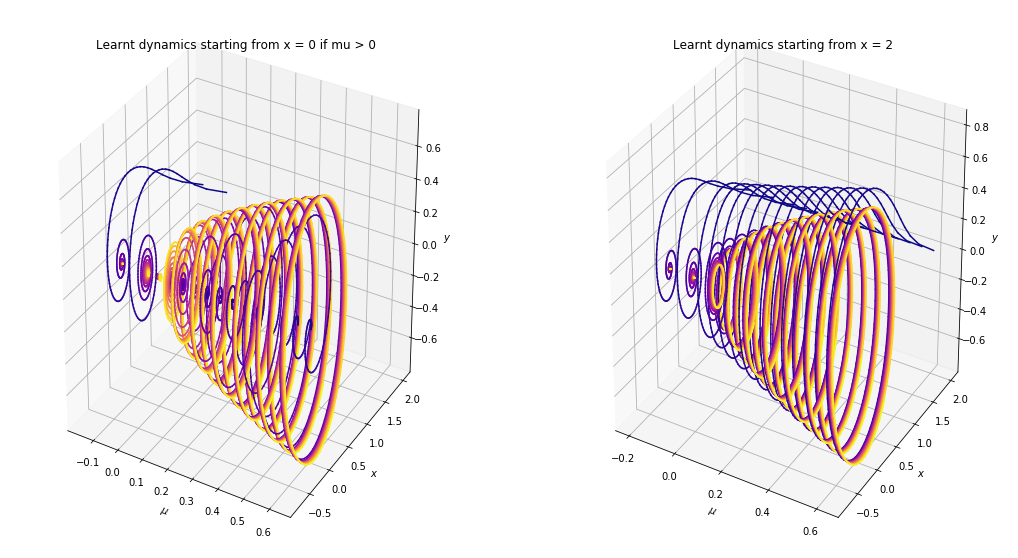

In [12]:
# two control points
checkpt = 15

fig = plt.figure(figsize=(18,10)) # twice as wide as it is tall
ax = fig.add_subplot(1, 2, 1, projection='3d')

for j in range(0, checkpt):
    mu = hopf_pred[j, :, 0]
    x = hopf_pred[j, :, 1]
    y = hopf_pred[j, :, 2]
    
    for i in range(0, len(x)):
        ax.plot(mu[i:i+2], x[i:i+2], y[i:i+2], color=plt.cm.plasma(int(255*i/len(x))))

ax.set_xlabel('$\mu$')
ax.set_ylabel('$x$')
ax.set_zlabel('$y$')
ax.set_title('Learnt dynamics starting from x = 0 if mu > 0', fontsize = 12, loc='center', pad=2.0)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for j in range(checkpt, hopf_pred.shape[0]):
    mu = hopf_pred[j, :, 0]
    x = hopf_pred[j, :, 1]
    y = hopf_pred[j, :, 2]
    
    for i in range(0, len(x)):
        ax.plot(mu[i:i+2], x[i:i+2], y[i:i+2], color=plt.cm.plasma(int(255*i/len(x))))

ax.set_xlabel('$\mu$')
ax.set_ylabel('$x$')
ax.set_zlabel('$y$')
ax.set_title('Learnt dynamics starting from x = 2', fontsize = 12, loc='center', pad=2.0)

plt.show()

The trajectory of our solution in the phase space: the color goes from dark to bright as time progresses.

![colormap](https://matplotlib.org/_images/sphx_glr_colormaps_001.png)